### - Dynamique Programming - 

### Valus iteration

In [1]:
import sys
sys.path.append("..")


In [5]:
from envs.grid import actions_idx,etats ,recompenses,etats_terminaux,reinitialiser,faire_un_pas,obtenir_actions,p

from algos.dynamic_programming import value_iteration_dp
politique, V, *_ = value_iteration_dp(
    etats, actions_idx, p, recompenses, etats_terminaux,
    gamma=0.95, theta=0.0000001,verbose= False 
)

Value Iteration DP:   8%|▊         | 8/100 [00:00<00:00, 460.36it/s]


In [3]:
print(politique)

{0: 1, 1: 1, 2: 2, 3: None, 4: None, 5: 1, 6: 1, 7: 1, 8: 2, 9: None, 10: 1, 11: 1, 12: 1, 13: 2, 14: None, 15: 1, 16: 1, 17: 1, 18: 2, 19: None, 20: 1, 21: 1, 22: 1, 23: 1, 24: None}


In [ ]:
from envs.grid import actions_idx,etats ,recompenses,etats_terminaux,reinitialiser,faire_un_pas,obtenir_actions,p

from algos.dynamic_programming import value_iteration_dp
politique, V, *_ = value_iteration_dp(
    etats, actions_idx, p, recompenses, etats_terminaux,
    gamma=0.95, theta=0.0000001,verbose= False 
)

### SARSA

In [7]:
import sys, pathlib
sys.path.append("..")                     # <- si tes paquets sont à la racine

# algos perso
from algos.temporal_difference_learning import (
    sarsa_q_learning, afficher_politique, tracer_loss
)
from algo_sauvgarde import sauvegarder_resultats, charger_resultats_depuis_chemin

# environnement Grid World 5×5
import envs.grid as gw              # (nom du fichier .py que tu as créé)


In [ ]:
import sys, pathlib, pprint
sys.path.append("..")                         

from algos.temporal_difference_learning import (
    sarsa_q_learning, afficher_politique, tracer_loss
)
import envs.grid as gw                  


Q, df_q, historique_loss = sarsa_q_learning(
    reinitialiser    = gw.reinitialiser,
    faire_un_pas     = gw.faire_un_pas,
    obtenir_actions  = gw.obtenir_actions,    
    episodes         = 20_000,                
    alpha            = 0.1,
    gamma            = 0.99,
    epsilon          = 0.1,
    etats_suivis     = gw.etats,              
    mode             = "sarsa",               # ou "q_learning"
    verbose          = False                  
)


Entraînement: 100%|██████████| 20000/20000 [00:03<00:00, 6271.52it/s]


In [10]:
policy = {}
for s in gw.etats:
    if s in gw.etats_terminaux:
        continue
    policy[s] = max(gw.obtenir_actions(s), key=lambda a: Q[(s, a)])

In [11]:
print(policy)

{0: 2, 1: 2, 2: 3, 5: 1, 6: 2, 7: 3, 8: 3, 10: 1, 11: 2, 12: 3, 13: 3, 15: 0, 16: 1, 17: 2, 18: 2, 20: 0, 21: 0, 22: 1, 23: 1}


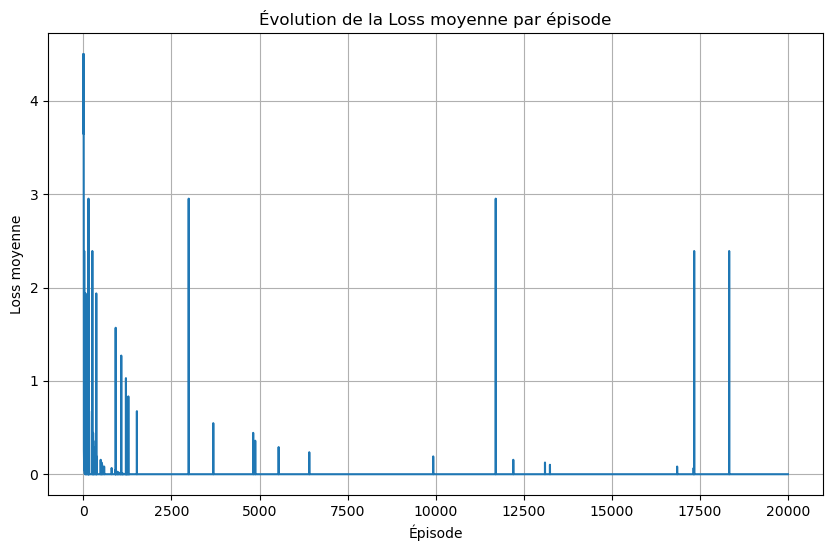

In [12]:
tracer_loss(historique_loss)

In [15]:
import sys, pathlib, pprint
sys.path.append("..")                         

from algos.temporal_difference_learning import (
    sarsa_q_learning, afficher_politique, tracer_loss
)
import envs.grid as gw                  


Q, df_q, historique_loss = sarsa_q_learning(
    reinitialiser    = gw.reinitialiser,
    faire_un_pas     = gw.faire_un_pas,
    obtenir_actions  = gw.obtenir_actions,    
    episodes         = 20_000,                
    alpha            = 0.1,
    gamma            = 0.99,
    epsilon          = 0.1,
    etats_suivis     = gw.etats,              
    mode             = "q_learning",               # ou "q_learning"
    verbose          = False                  
)


Entraînement: 100%|██████████| 20000/20000 [01:51<00:00, 179.32it/s]


In [16]:
policy = {}
for s in gw.etats:
    if s in gw.etats_terminaux:
        continue
    policy[s] = max(gw.obtenir_actions(s), key=lambda a: Q[(s, a)])

In [17]:
print(policy)

{0: 0, 1: 0, 2: 0, 5: 0, 6: 0, 7: 0, 8: 2, 10: 0, 11: 0, 12: 0, 13: 0, 15: 0, 16: 0, 17: 0, 18: 0, 20: 0, 21: 0, 22: 0, 23: 0}


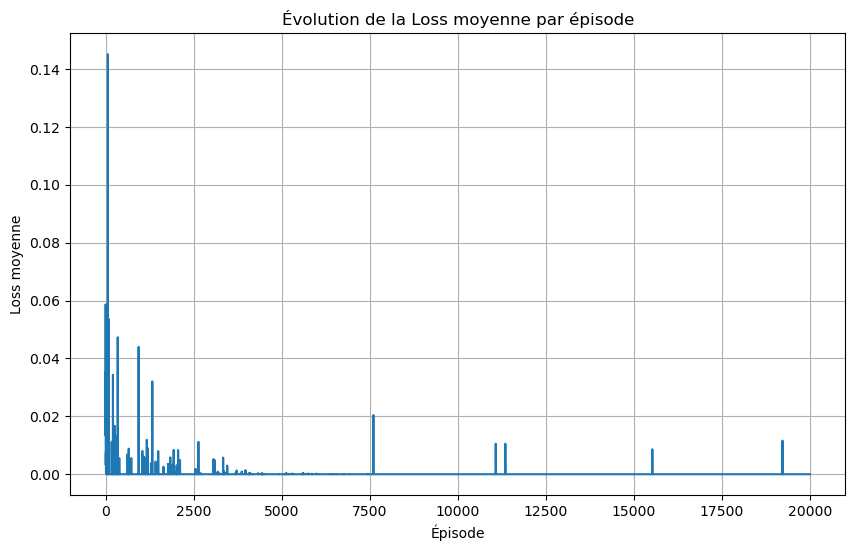

In [18]:
tracer_loss(historique_loss)